In [1]:
import cv2, imp, os
from PIL import Image, ImageDraw
import numpy as np
from IPython.display import display
from matplotlib.pyplot import imshow
import package.augmentation as augm
%matplotlib inline

In [6]:
imp.reload(augm)
# jpg_root = './../../lc_files/20181218_jpg/469LC1183340002/page_1.jpg'
jpg_path = './../cv_test2.jpg'
img = cv2.imread(jpg_path, 0)
augmeted = img

kernel_hit = np.array([ [0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]],np.uint8)
hitormiss = img
hitormiss = cv2.bitwise_not(hitormiss) 
hitormiss = cv2.morphologyEx(hitormiss, cv2.MORPH_HITMISS, kernel)
hitormiss = cv2.bitwise_not(hitormiss) 


kernel = (2, 2)
eroded = augm.erodeImage(augmeted, kernel)


# augmeted = cv2.bitwise_not(augmeted)
# augmeted = cv2.threshold(augmeted, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# augmeted = cv2.adaptiveThreshold(augmeted, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)
# augmeted = cv2.threshold(augmeted, 80, 255,cv2.THRESH_BINARY)[1]
# augmeted = cv2.bitwise_not(augmeted)

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 10,-1],
                              [-1,-1,-1]])

sharpened = img
# sharpened = augm.erodeImage(sharpened, kernel)
# sharpened = cv2.threshold(sharpened, 200, 255,cv2.THRESH_BINARY)[1]
sharpened = cv2.filter2D(sharpened, -1, kernel_sharpening)
# sharpened = augm.erodeImage(sharpened, kernel)

opening = img
opening = cv2.bitwise_not(opening) 
# opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
opening = cv2.threshold(opening, 70, 255,cv2.THRESH_BINARY)[1]
opening = augm.dilateImage(opening, kernel)
opening = cv2.bitwise_not(opening) 


image1 = Image.fromarray(img)
image2 = Image.fromarray(hitormiss)
image3 = Image.fromarray(sharpened)
image4 = Image.fromarray(opening)
display(image1)
display(image2)
display(image3)
display(image4)

# image1 = Image.fromarray(cv2.threshold(img, 100, 255,cv2.THRESH_BINARY)[1])
# image1.save('img_1.jpg', "JPEG")
# image2.save('img_2.jpg', "JPEG")
# image3.save('img_3.jpg', "JPEG", quality=90)
# image4.save('img_4.jpg', "JPEG", quality=90)

NameError: name 'kernel' is not defined

In [ ]:
import package.utils as utils
import package.visionapi as visionapi
import package.augmentation as imgaug
import service

imp.reload(utils)
imp.reload(visionapi)
imp.reload(imgaug)
imp.reload(service)

jpg_root = './../../lc_files/20181218/jpgs/MF0IML183330002'
jpg_list = ['./../../lc_files/20181218/jpgs/MF0IML183330002/page_1.jpg', 
            './../../lc_files/20181218/jpgs/MF0IML183330002/page_2.jpg', 
            './../../lc_files/20181218/jpgs/MF0IML183330002/page_3.jpg', 
            './../../lc_files/20181218/jpgs/MF0IML183330002/page_4.jpg', 
            './../../lc_files/20181218/jpgs/MF0IML183330002/page_5.jpg']

credential = '../../service_acc.json'
visionapi.set_vision_credential(credential)
# res = visionapi.annotateDocument(saved_path)
service.annotateCreditLetter(credential, '0001', jpg_list, jpg_root)

In [ ]:
def test_hitormiss(input_image):
    input_image = cv2.threshold(input_image, 100, 255, cv2.THRESH_BINARY)[1]
    input_image_comp = cv2.bitwise_not(input_image)  # could just use 255-img

    kernel1 = np.array([[0, 0, 0],
                        [0, 1, 0],
                        [0, 0, 0]], np.uint8)
    kernel2 = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]], np.uint8)

    hitormiss1 = cv2.morphologyEx(input_image, cv2.MORPH_ERODE, kernel1)
    hitormiss2 = cv2.morphologyEx(input_image_comp, cv2.MORPH_ERODE, kernel2)
    hitormiss = cv2.bitwise_and(hitormiss1, hitormiss2)
    hitormiss_comp = cv2.bitwise_not(hitormiss)  # could just use 255-img
    return hitormiss1
#     del_isolated = cv2.bitwise_and(input_image, input_image, mask=hitormiss_comp)
#     return del_isolated

hitormiss = test_hitormiss(img)
# hitormiss = test_hitormiss(hitormiss)
# hitormiss = test_hitormiss(hitormiss)

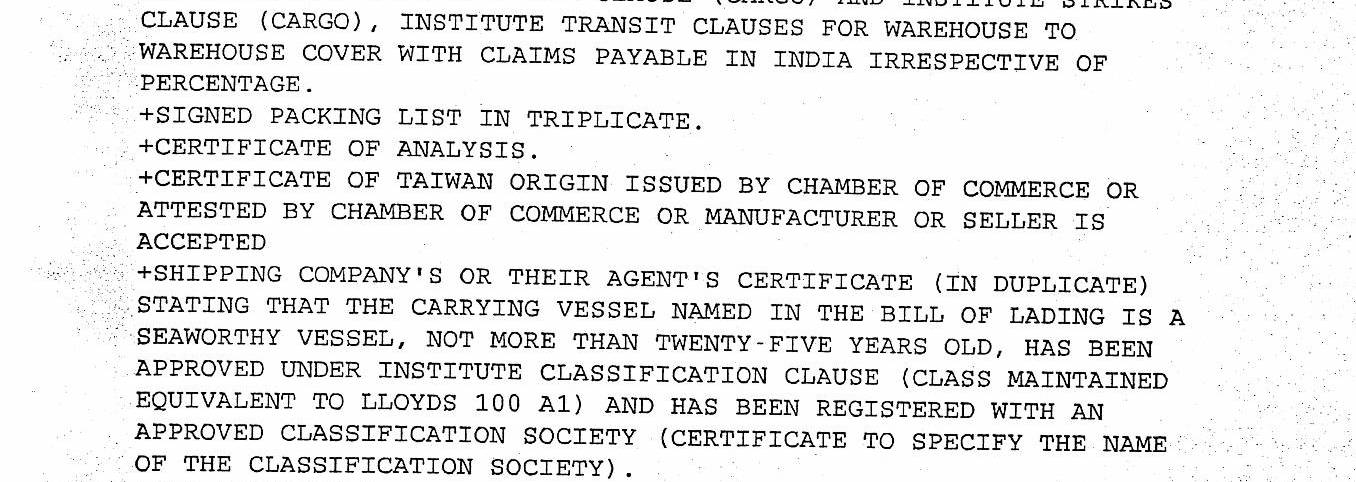

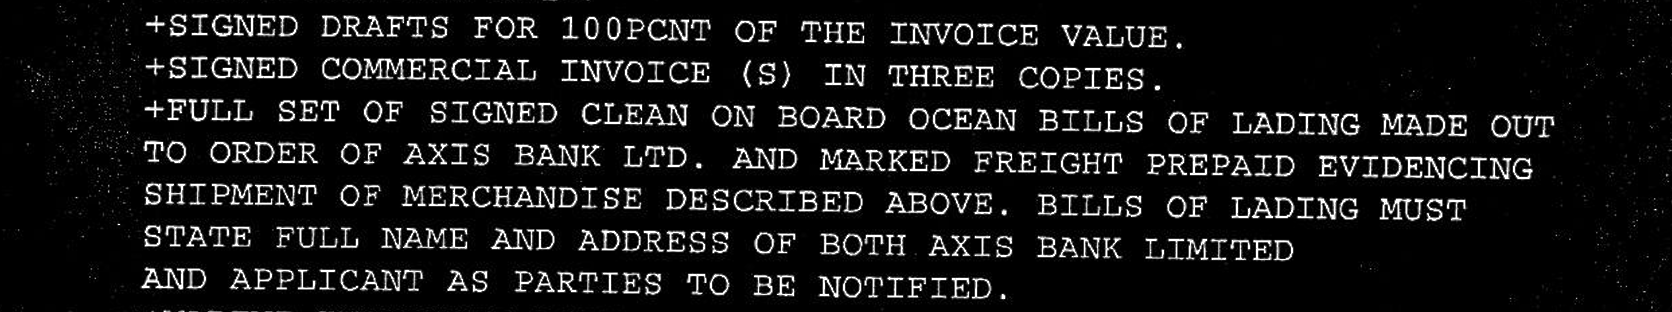

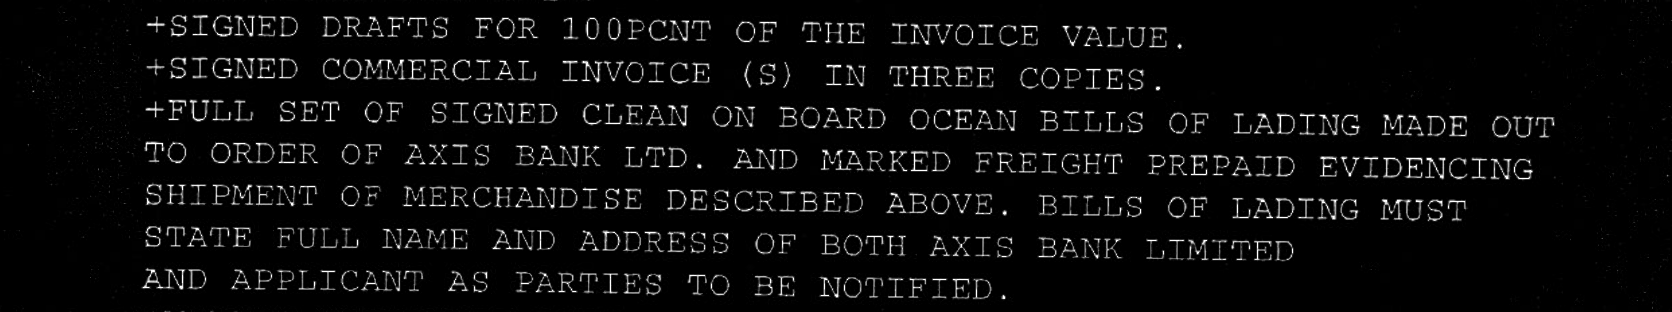

In [26]:
eroded2 = augm.erodeImage(hitormiss, kernel)
image5 = Image.fromarray(hitormiss)
image6 = Image.fromarray(eroded2)
display(image1)
display(image5)
display(image6)

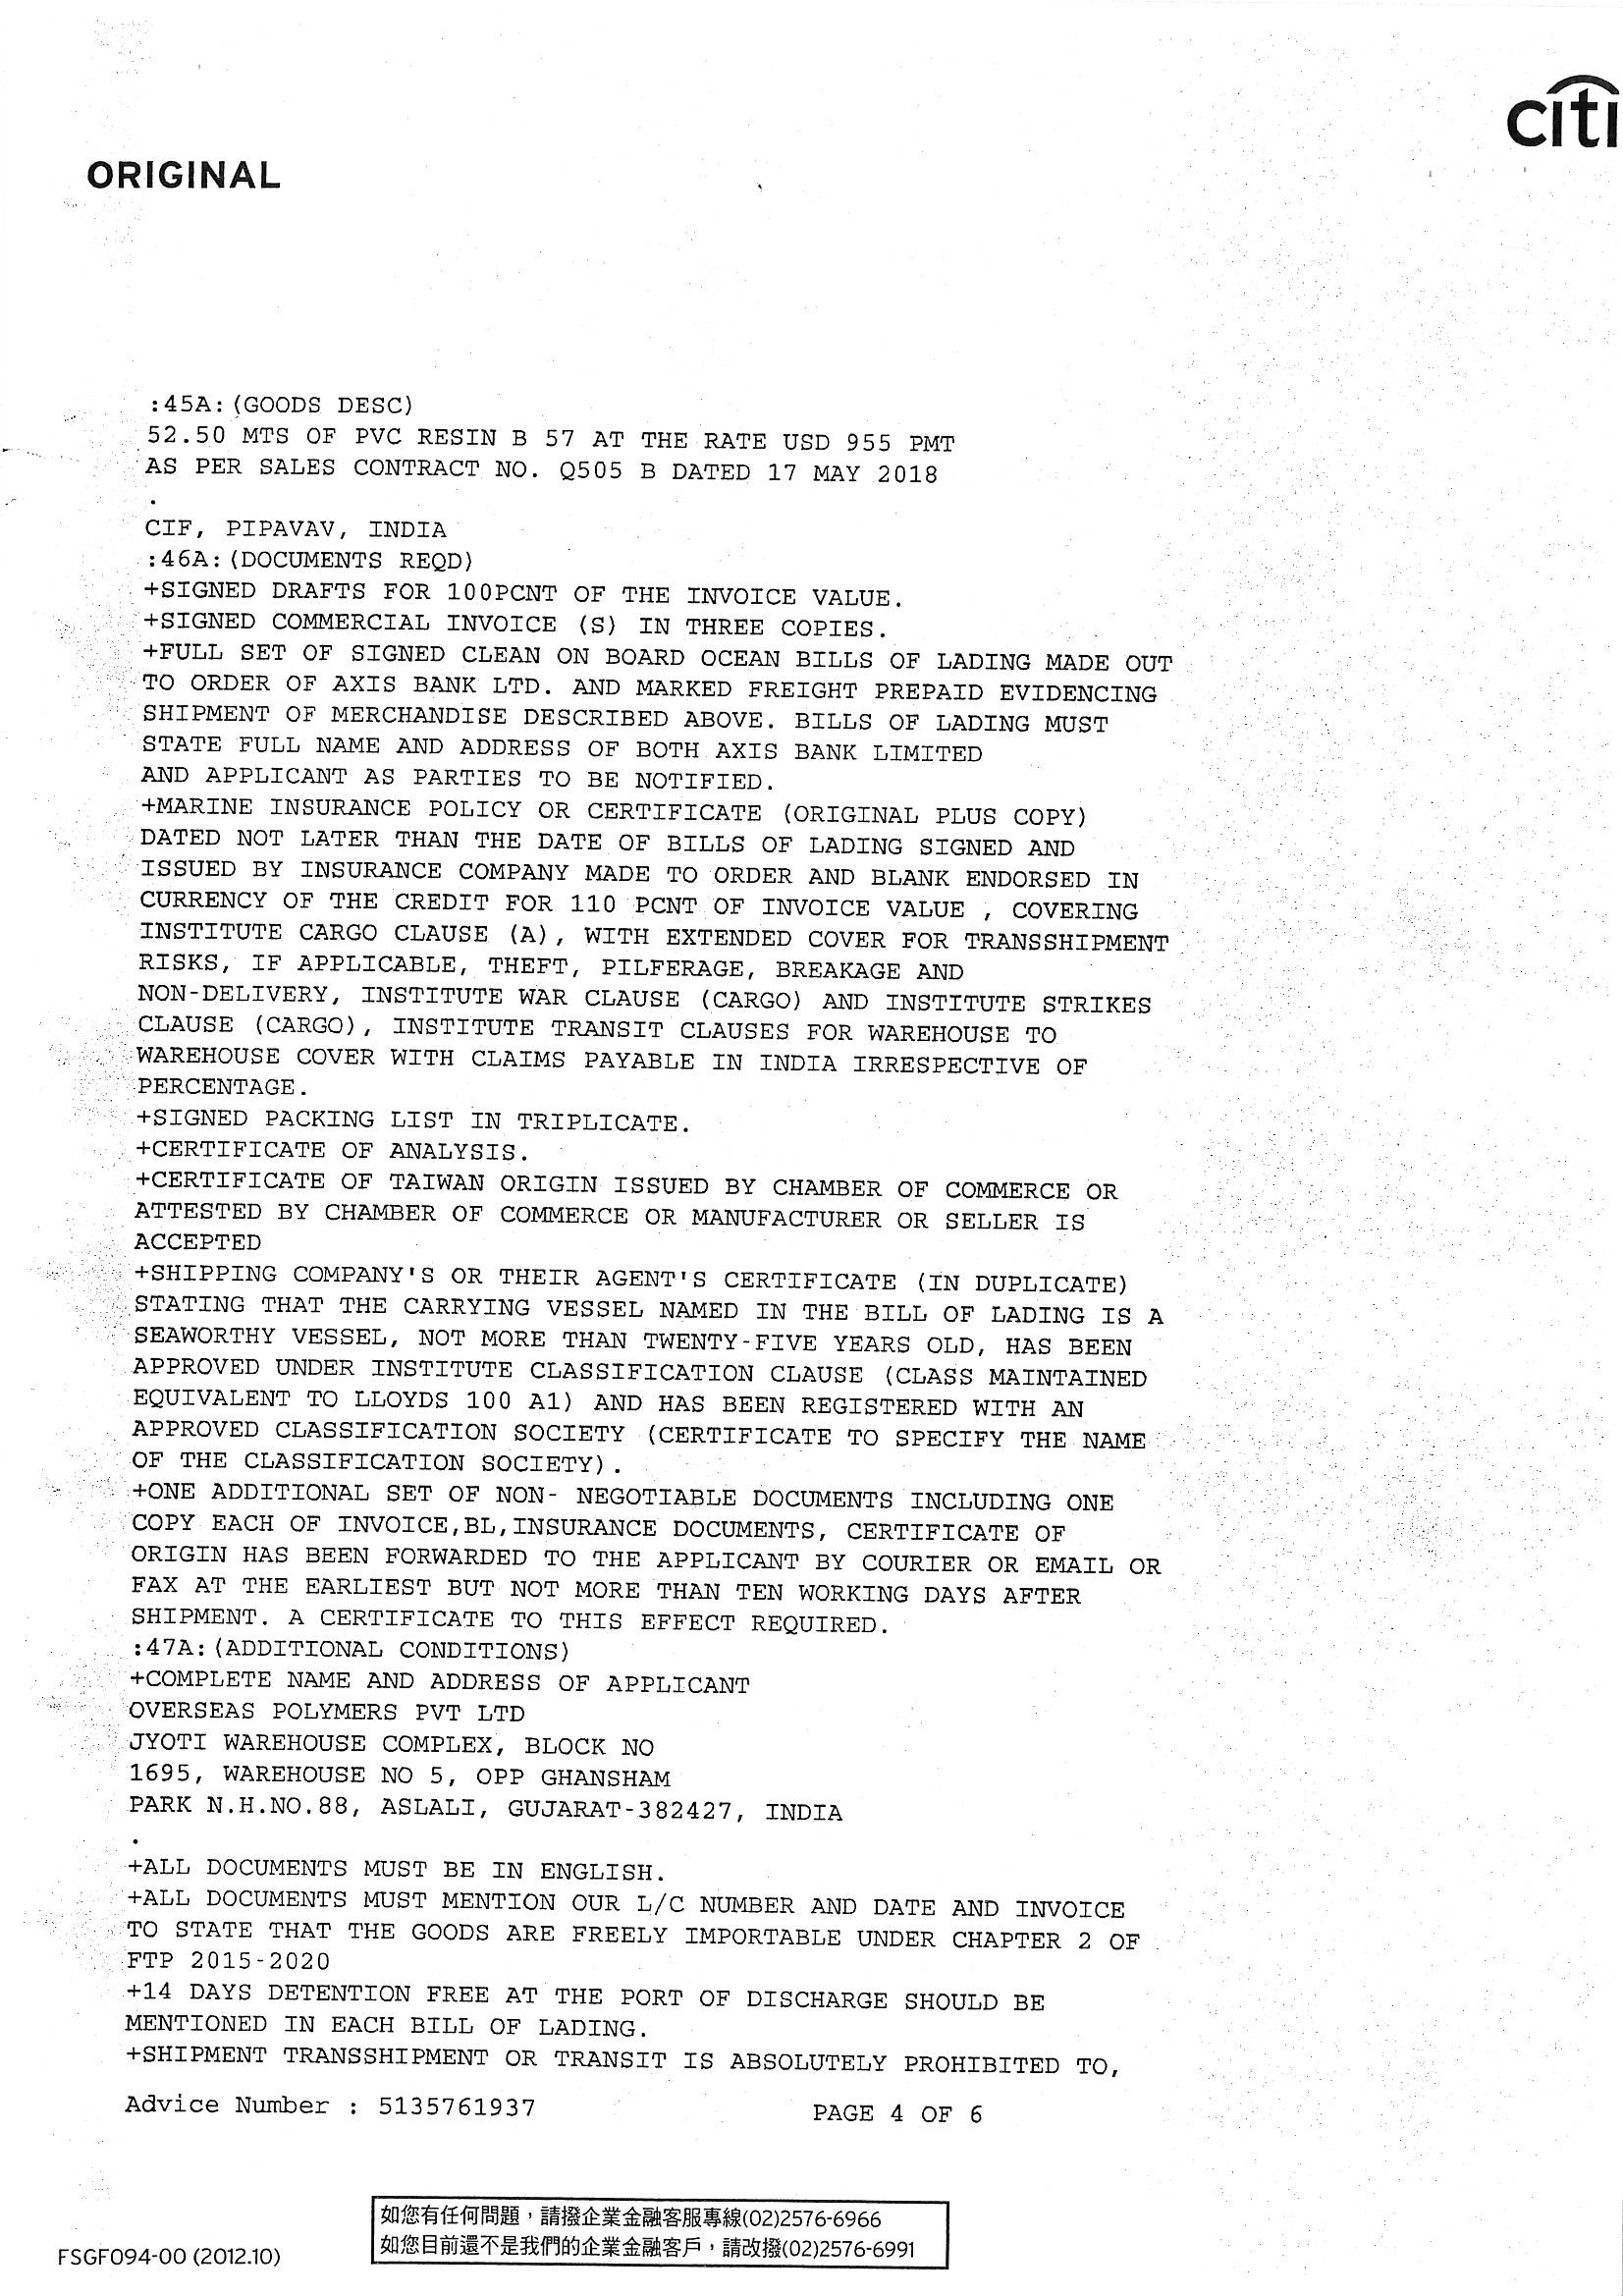

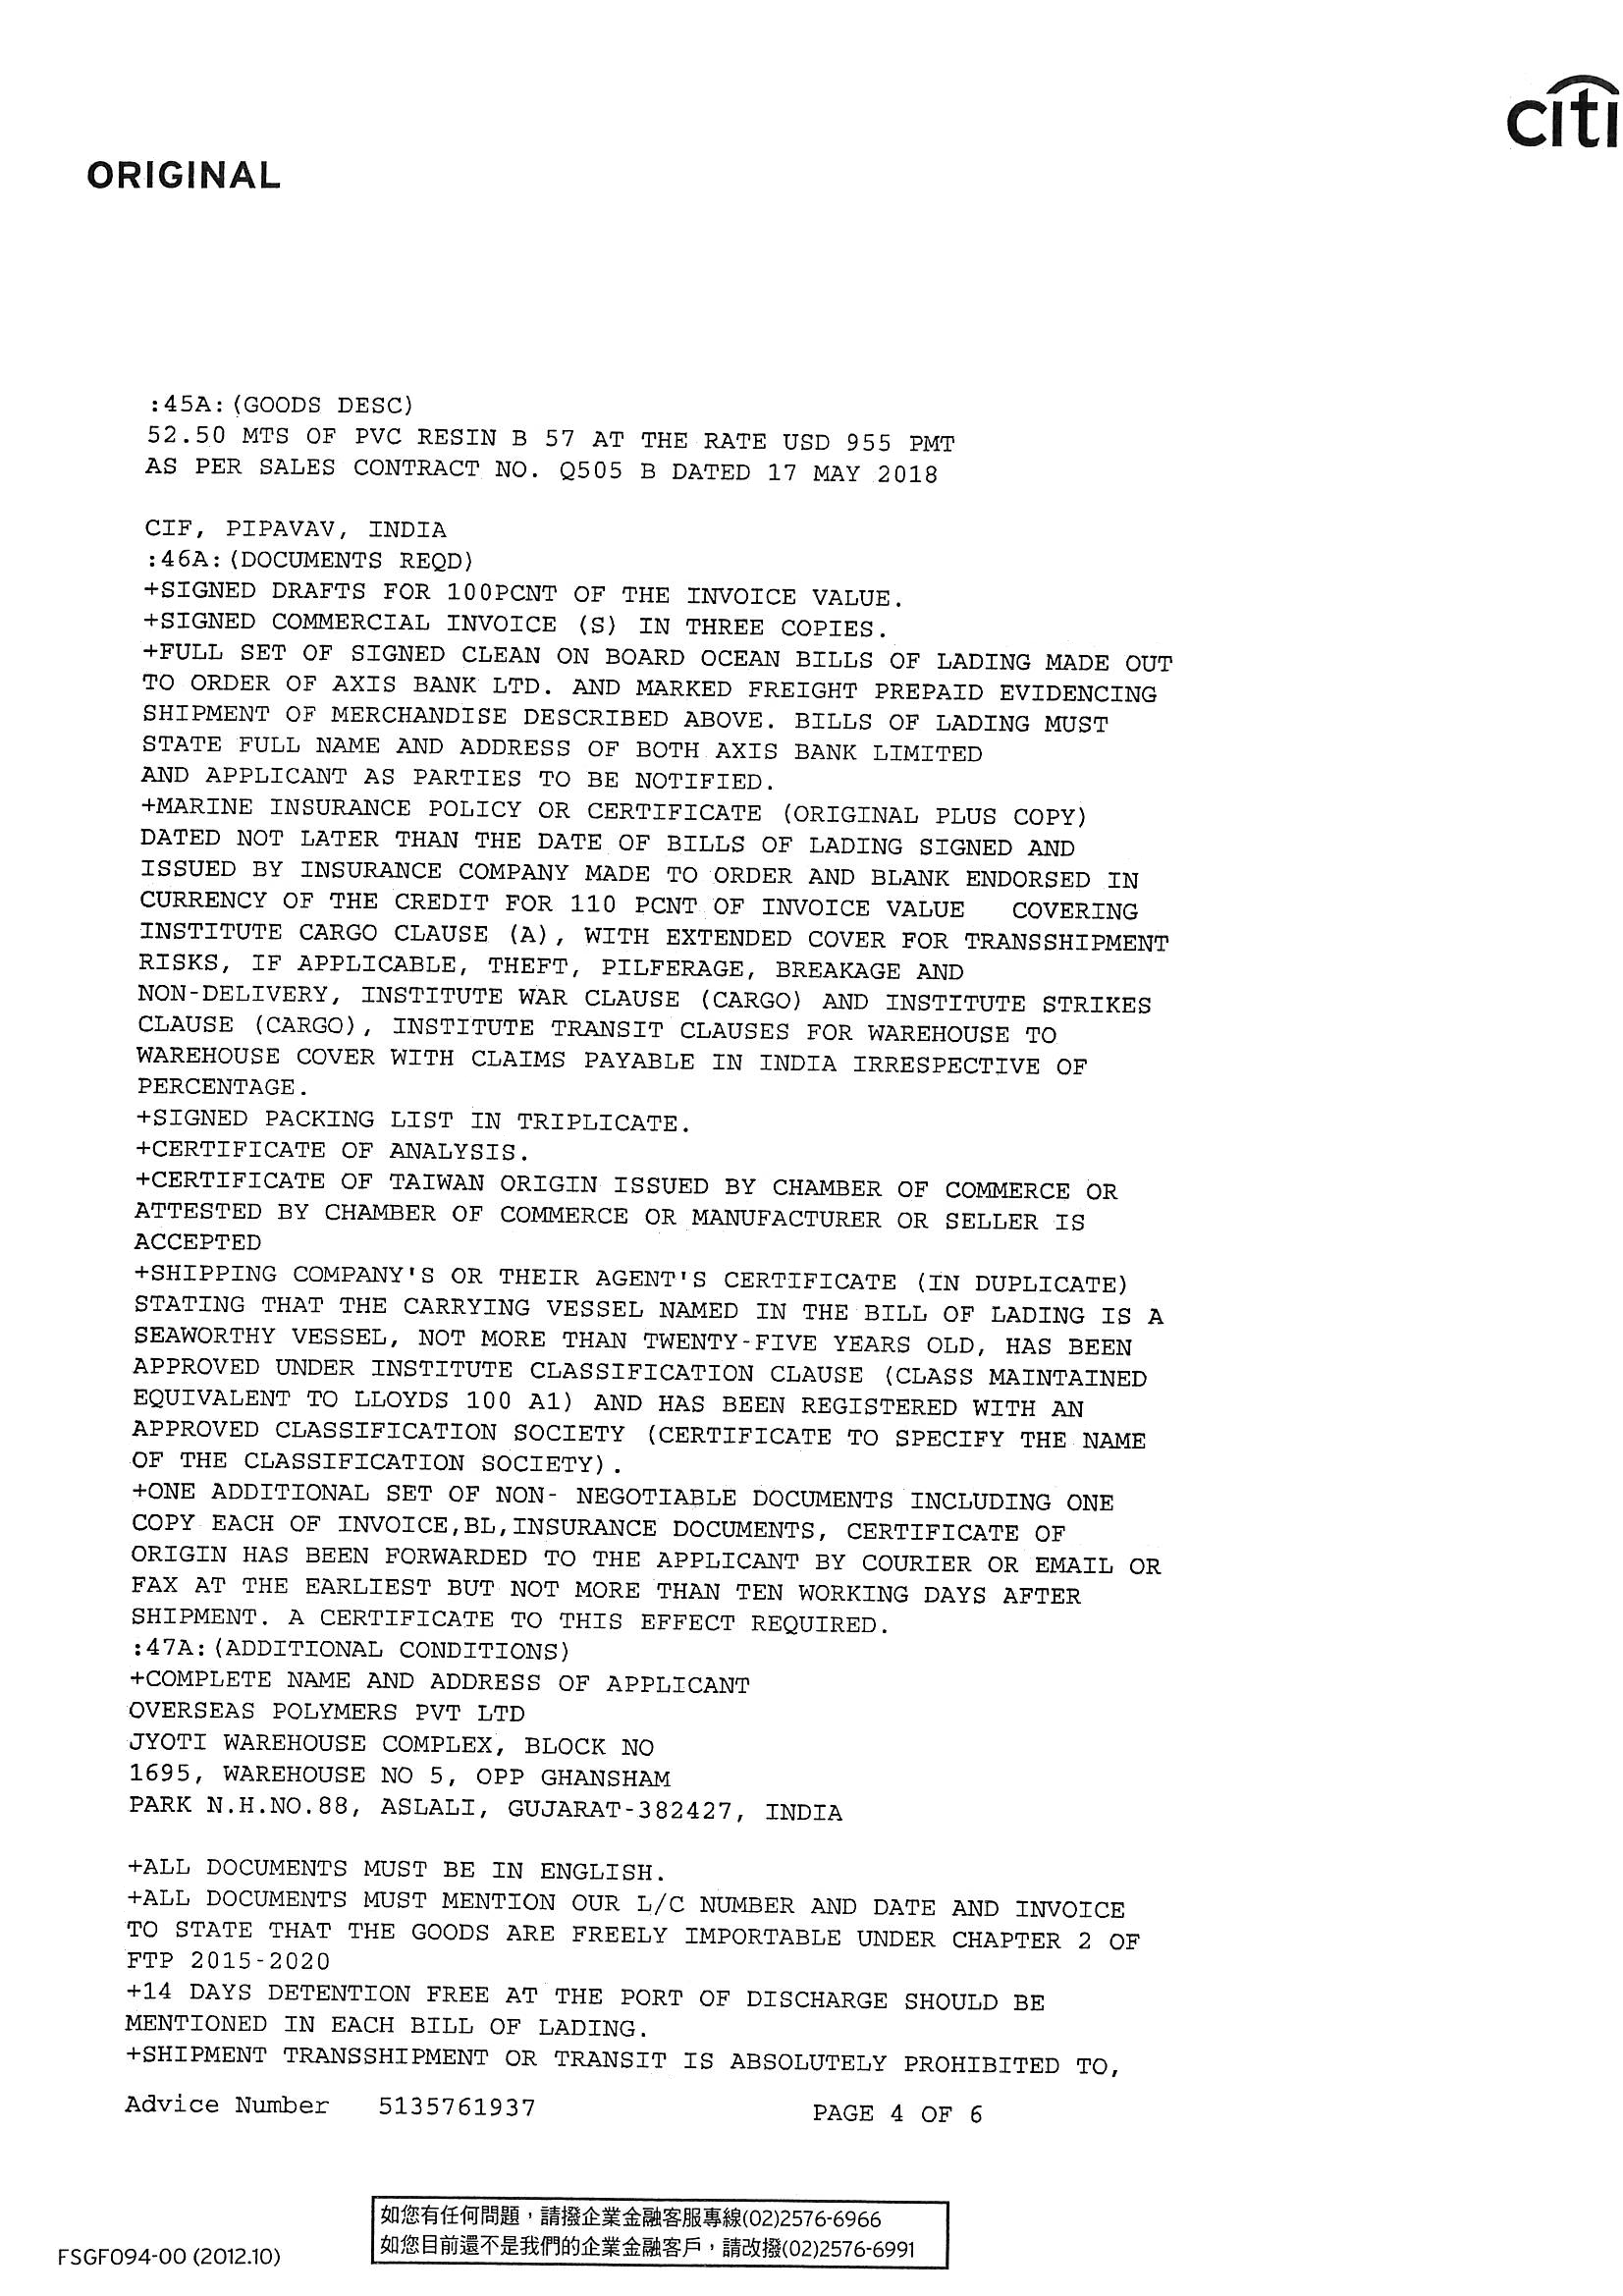

In [58]:
def testingText(img_path):
    large = cv2.imread(img_path, 0)
    small = cv2.pyrDown(large)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

    _, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
    connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
    # using RETR_EXTERNAL instead of RETR_CCOMP
    im2, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    mask = np.zeros(bw.shape, dtype=np.uint8)

    for idx in range(len(contours)):
        x, y, w, h = cv2.boundingRect(contours[idx])
        mask[y:y+h, x:x+w] = 0
        if w > 4 and h > 4:
            cv2.rectangle(mask, (x, y), (x+w-1, y+h-1), (255, 255, 255), -1)

    masked = large
    mask = cv2.pyrUp(mask, dstsize=(large.shape[1], large.shape[0]))
    masked = cv2.bitwise_not(masked)
    masked = cv2.bitwise_and(masked, mask)
    masked = cv2.bitwise_not(masked)
    return masked

kernel = (2,2)
jpg_root = './../../lc_files/20190102/jpgs/0004FLC180147/page_4.jpg'
# jpg_root = './../cv_test3.jpg'
img = cv2.imread(jpg_root, 0)
image1 = Image.fromarray(img)
test_blocks = testingText(jpg_root)
# test_blocks = augm.erodeImage(test_blocks, kernel)
image7 = Image.fromarray(test_blocks)
display(image1)
display(image7)
image7.save('img7.jpg', "JPEG", quality=90)

In [38]:
import math
testn = 1.5
print(math.floor(testn))

1
